In [28]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
customer_churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

---

In [4]:
customer_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

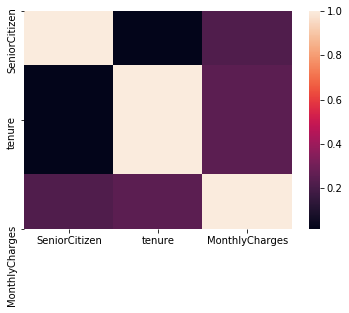

In [6]:
sns.heatmap(customer_churn.corr())

In [7]:
lb = LabelEncoder()

for i in customer_churn.columns:
    yes = 'Yes' in list(customer_churn[i].unique())
    no = 'No' in list(customer_churn[i].unique())
    if yes and no and len(customer_churn[i].unique()) == 2:
        customer_churn[i] = lb.fit_transform(customer_churn[i])

In [8]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


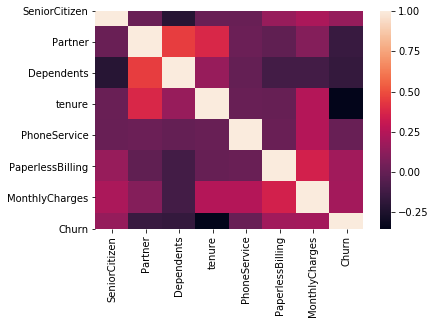

In [9]:
sns.heatmap(customer_churn.corr())

In [10]:
customer_churn['TotalCharges'] = pd.to_numeric(customer_churn['TotalCharges'], errors='coerce')
customer_churn['TotalCharges'].fillna(customer_churn['TotalCharges'].mean() , inplace=True)

---

In [11]:
numerics = ['int16', 'int32', 'int64','float16', 'float32', 'float64']
categorical_customer_churn = customer_churn.select_dtypes(exclude=numerics)
dummy = [x for x in categorical_customer_churn if x != 'customerID']
dummy

['gender',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [16]:
customer_churn_dummy = pd.get_dummies(customer_churn, prefix_sep='__', columns=dummy)
customer_churn_dummy.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies__No,StreamingMovies__No internet service,StreamingMovies__Yes,Contract__Month-to-month,Contract__One year,Contract__Two year,PaymentMethod__Bank transfer (automatic),PaymentMethod__Credit card (automatic),PaymentMethod__Electronic check,PaymentMethod__Mailed check
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


---

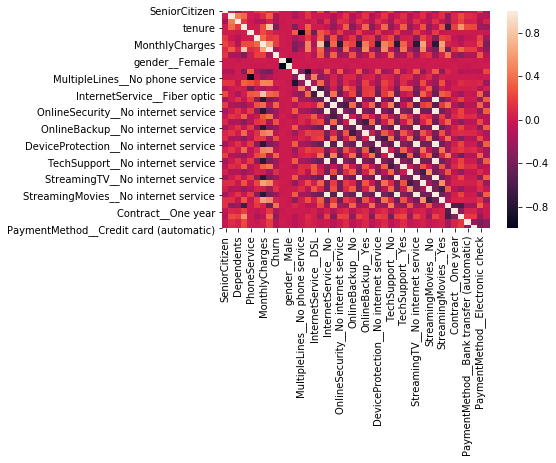

In [17]:
sns.heatmap(customer_churn_dummy.corr())

In [18]:
customer_churn_dummy.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender__Female,...,StreamingMovies__No,StreamingMovies__No internet service,StreamingMovies__Yes,Contract__Month-to-month,Contract__One year,Contract__Two year,PaymentMethod__Bank transfer (automatic),PaymentMethod__Credit card (automatic),PaymentMethod__Electronic check,PaymentMethod__Mailed check
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.102395,0.150889,0.001874,...,0.034210,-0.182742,0.120176,0.138360,-0.046262,-0.117000,-0.016159,-0.024135,0.171718,-0.153477
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,0.318812,-0.150448,0.001808,...,-0.117529,0.000615,0.117412,-0.280865,0.082783,0.248091,0.110706,0.082029,-0.083852,-0.095125
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,0.064535,-0.164221,-0.010517,...,-0.078198,0.139812,-0.039741,-0.231720,0.068368,0.204613,0.052021,0.060267,-0.150642,0.059071
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.824757,-0.352229,-0.005106,...,-0.252220,-0.039062,0.286111,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.112851,0.011942,0.006488,...,-0.112254,0.172209,-0.032959,-0.000742,-0.002791,0.003519,0.007556,-0.007721,0.003062,-0.003319
PaperlessBilling,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.157676,0.191825,0.011754,...,0.059488,-0.321013,0.211716,0.169096,-0.051391,-0.147889,-0.016332,-0.013589,0.208865,-0.205398
MonthlyCharges,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.650468,0.193356,0.014569,...,0.018075,-0.763557,0.627429,0.060165,0.004904,-0.074681,0.042812,0.030550,0.271625,-0.377437
TotalCharges,0.102395,0.318812,0.064535,0.824757,0.112851,0.157676,0.650468,1.000000,-0.199428,-0.000048,...,-0.202451,-0.374263,0.519574,-0.446348,0.170491,0.357224,0.185992,0.182581,-0.060412,-0.294125
Churn,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,-0.199428,1.000000,0.008612,...,0.130845,-0.227890,0.061382,0.405103,-0.177820,-0.302253,-0.117937,-0.134302,0.301919,-0.091683
gender__Female,0.001874,0.001808,-0.010517,-0.005106,0.006488,0.011754,0.014569,-0.000048,0.008612,1.000000,...,-0.005374,-0.006026,0.010487,0.003386,-0.008026,0.003695,0.016024,-0.001215,-0.000752,-0.013744


In [55]:
y = customer_churn_dummy['Churn']
feature_cols = [x for x in customer_churn_dummy.columns if ((x != 'Churn') and (x != 'customerID'))]
X = customer_churn_dummy[feature_cols]

In [56]:
X.shape

(7043, 41)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

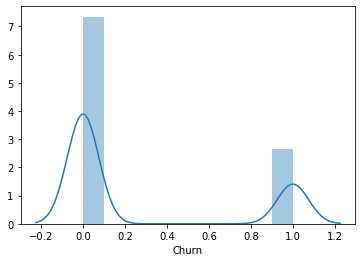

In [58]:
sns.distplot(y)

---

In [59]:
dt = DecisionTreeClassifier(random_state=7)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7250354945575012


In [67]:
from sklearn.ensemble import BaggingClassifier

In [73]:
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=7)
bc.fit(X_train, y_train)
y_pred_bc = bc.predict(X_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bc))

Bagging Accuracy: 0.7813535257927118
